In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import fmin

In [2]:
WIDTH = 2.584

In [3]:
plt.style.use(['./thesis.mplstyle', "petroff10"])

In [4]:
def landau_free_energy(phi, a, t, T_C, u):
    return -0.5 * a * T_C * (1 - t) * np.power(np.abs(phi), 2) + 0.25 * u * np.power(np.abs(phi), 4)

In [5]:
a = 1
T_C = 1
u = 1

phi = np.linspace(-1.5, 1.5, num=500)

fig, ax = plt.subplots(figsize=(WIDTH, WIDTH))

t = 1e-6
ax.plot(phi, landau_free_energy(phi, a, t, T_C, u), color="C0")

t = 0.4
ax.plot(phi, landau_free_energy(phi, a, t, T_C, u), color="C1")
ax.text(-1.47, 0.35, r'$T < T_C$', size="small", rotation=-80, color="C1")

t = 4
ax.plot(phi, landau_free_energy(phi, a, t, T_C, u), color="C2")
ax.text(-0.55, 0.35, '$T > T_C$', size="small", rotation=-80, color="C2")

t = 1
ax.plot(phi, landau_free_energy(phi, a, t, T_C, u), color="C3")
ax.text(-1.15, 0.35, '$T = T_C$', size="small", rotation=-80, color="C3")

# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
# Hide the top and right spines.
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_ylim(top=0.5, bottom=-0.3)

ax.set_xlabel(r"$\Psi$")
ax.xaxis.set_label_coords(0.97, 0.34)

ax.set_ylabel(r"$f_{\mathrm{L}}$", rotation=0)
ax.yaxis.set_label_coords(0.58, 0.95)

fig.savefig("landau_free_energy.pgf")
plt.close(fig)

In [6]:
def ginzburg_landau_free_energy(phi_re, phi_im, a, t, T_C, u):
    return -0.5 * a * T_C * (1 - t) * np.power(np.abs(phi_re + 1j * phi_im), 2) + 0.25 * u * np.power(np.abs(phi_re + 1j * phi_im), 4)

In [7]:
a = 1
T_C = 1
u = 1

r = np.linspace(0, 1.28, 200)
theta = np.linspace(0, 2*np.pi, 200)
r, theta = np.meshgrid(r, theta)

phi_RE = r * np.sin(theta)
phi_IM = r * np.cos(theta)

fig, ax = plt.subplots(figsize=(WIDTH, WIDTH), subplot_kw={"projection": "3d"})

val_x = -2.05
val_y = -2.05
val_z = 0.3
origin = [0, 0, -0.2]

headwidth = 1.0

ax.quiver(*origin, val_x, 0, 0, color='k', arrow_length_ratio=0.05)
ax.text(x=val_x + 0.1, y=origin[1], z=origin[2] + 0.01, s=r'$\Re \Psi$')

ax.quiver(*origin, 0, val_y, 0, color='k', arrow_length_ratio=0.05)
ax.text(x=origin[0], y=val_y + 0.3, z=origin[2] - 0.04, s=r'$\Im \Psi$')

ax.quiver(*origin, 0, 0, val_z, color='k', pivot="tail", arrow_length_ratio=0.15)
ax.text(x=origin[0], y=origin[1] + 0.3, z=val_z - 0.23, s=r'$f_{\mathrm{L}}$')

t = 1e-6
Z = ginzburg_landau_free_energy(phi_RE, phi_IM, a, t, T_C, u)
surf = ax.plot_surface(phi_RE, phi_IM, Z, cmap=cm.viridis, linewidth=0, antialiased=True)

# Hide everything else
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# Hide box axes
ax._axis3don = False

ax.view_init(azim=-70, elev=30)

# Expand to remove white space
max_x_y = 1.2
ax.set_xlim(np.array([-max_x_y, max_x_y]))
ax.set_ylim(np.array([-max_x_y, max_x_y]))
ax.set_zlim(np.array([-0.3, 0]))

fig.savefig("ginzburg_landau_free_energy.pgf")
plt.close(fig)

In [8]:
def ginzburg_landau_order_parameter_vs_q(q):
    return np.sqrt(1 - q**2)

In [9]:
def ginzburg_landau_current_vs_q(q):
    return ginzburg_landau_order_parameter_vs_q(q)**2 * q

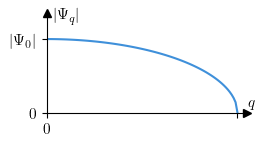

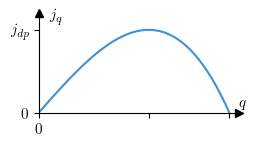

In [10]:
q_interpolate = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(WIDTH, WIDTH / 2))

ax.plot(q_interpolate, ginzburg_landau_order_parameter_vs_q(q_interpolate), color='C0')

ax.set_ylabel(r"$\vert \Psi_q \vert$", rotation=0)
ax.set_xlabel("$q$")

zero_value = ginzburg_landau_order_parameter_vs_q(0)

ax.set_xlim(left=0)
ax.set_ylim(bottom=0, top=1.35 * zero_value)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.xaxis.set_label_coords(1.02, 0.17)
ax.yaxis.set_label_coords(0.105, 0.89)

ax.tick_params(axis="x", which="both", bottom=True, top=False, labelbottom=True)
ax.tick_params(axis="y", which="both", left=True, right=False, labelbottom=True)

ax.grid(False)

ax.set_yticks([0, zero_value], [0, r"$\vert \Psi_0 \vert$"])
ax.set_xticks([0, 1], [0, ""])

fig.savefig("ginzburg_landau_OP_vs_q.pgf")
#plt.close(fig)

q_interpolate = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(WIDTH, WIDTH / 2))

maximum = fmin(lambda x: -ginzburg_landau_current_vs_q(x), 0, disp=False, full_output=True)

ax.plot(q_interpolate, ginzburg_landau_current_vs_q(q_interpolate))

ax.set_ylabel("$j_q$", rotation=0)
ax.set_xlabel("$q$")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0, top=-1.2 * maximum[1])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.xaxis.set_label_coords(1.02, 0.17)
ax.yaxis.set_label_coords(0.08, 0.89)

ax.set_yticks([0, -maximum[1]], [0, "$j_{dp}$"])
ax.set_xticks([0, maximum[0][0], 1], [0, "", ""])

ax.tick_params(axis="x", which="both", bottom=True, top=False, labelbottom=True)
ax.tick_params(axis="y", which="both", left=True, right=False, labelbottom=True)

ax.grid(False)

fig.savefig("ginzburg_landau_current_vs_q.pgf")
#plt.close(fig)